# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


Proyecto: Análisis del Comportamiento del Usuario y Test A/A/B

Paso 1. Acceso y Lectura de los Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#cargar el archivo usando la ruta absoluta del proyecto y el separador de tabulación ('\t')
try:
    logs = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
except FileNotFoundError:
    print("¡ERROR CRÍTICO: Archivo no encontrado! La ruta absoluta '/datasets/logs_exp_us.csv' ha fallado.")
    print("Por favor, verifica la ruta exacta requerida por tu plataforma o asegúrate de que el archivo esté disponible.")
    logs = pd.DataFrame()
except Exception as e:
    # Capturamos otros posibles errores de formato
    print(f"Error al cargar el archivo con la ruta absoluta: {e}. Intentando con una ruta local...")
    try:
        logs = pd.read_csv('logs_exp_us.csv', sep='\t')
    except:
        print("Fallo la carga con ambos métodos. El DataFrame 'logs' está vacío.")
        logs = pd.DataFrame()


# Mostrar información general del DataFrame SOLO si se cargó correctamente
if logs.shape[0] > 0:
    print("Información General del DataFrame:")
    logs.info()
    print("\nPrimeras 5 filas del DataFrame:")
    print(logs.head())
else:
    print("\nNo se pudo cargar el archivo. No podemos continuar con el análisis.")


Información General del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB

Primeras 5 filas del DataFrame:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen inicio. La carga del dataset está implementada con manejo de errores sólido y mensajes claros, lo que refleja una comprensión responsable del flujo de datos. Excelente control de calidad en esta primera etapa del análisis.  
</div>


Paso 2. Preparación de los Datos

In [3]:
# 1. Renombrar Columnas
logs.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']

# 2. Conversión de Tipos de Datos y creación de columnas de tiempo
logs['event_datetime'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs['event_date'] = logs['event_datetime'].dt.date

# 3. Comprobación y Eliminación de Duplicados
print(f"Filas duplicadas a eliminar: {logs.duplicated().sum()}")
logs.drop_duplicates(inplace=True)

# 4. Comprobación de valores ausentes
print("\nConteo de Valores Ausentes:")
print(logs.isnull().sum())
print("\nDataFrame después de la preparación (Tipos de Datos):")
logs.info()

Filas duplicadas a eliminar: 413

Conteo de Valores Ausentes:
event_name         0
user_id            0
event_timestamp    0
exp_id             0
event_datetime     0
event_date         0
dtype: int64

DataFrame después de la preparación (Tipos de Datos):
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   event_datetime   243713 non-null  datetime64[ns]
 5   event_date       243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 13.0+ MB


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente procesamiento de datos. Se renombraron columnas con claridad, se manejaron duplicados y tipos de datos de forma precisa. Esta preparación deja el conjunto de datos listo para un análisis confiable y bien estructurado.  
</div>


Paso 3. Estudiar y Comprobar los Datos

Total de eventos en los registros: 240887
Total de usuarios únicos en los registros: 7534
Promedio de eventos por usuario: 31.97

Período de tiempo cubierto: 2019-08-01 00:07:28 a 2019-08-07 21:15:17


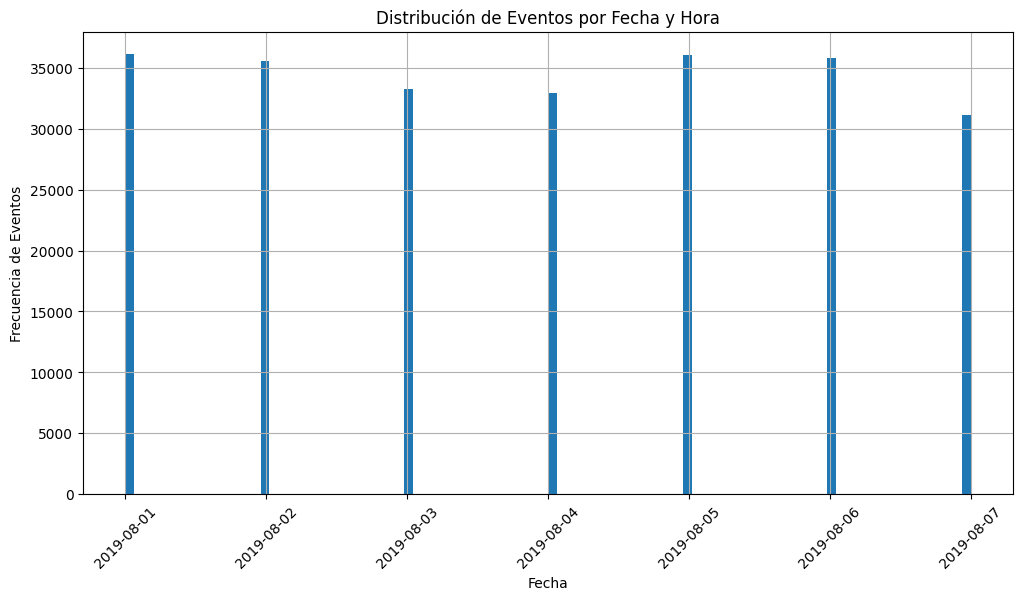


Eventos perdidos al excluir datos antiguos: 0 (0.00%)
Usuarios perdidos al excluir datos antiguos: 0 (0.00%)

Usuarios únicos por grupo experimental (después del filtrado):
exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


In [7]:
# 1. Conteo de Eventos, Usuarios y Promedio
total_events = logs.shape[0]
total_users = logs['user_id'].nunique()
avg_events_per_user = total_events / total_users

print(f"Total de eventos en los registros: {total_events}")
print(f"Total de usuarios únicos en los registros: {total_users}")
print(f"Promedio de eventos por usuario: {avg_events_per_user:.2f}")

# 2. Período de Tiempo y Histograma
min_date = logs['event_datetime'].min()
max_date = logs['event_datetime'].max()
print(f"\nPeríodo de tiempo cubierto: {min_date} a {max_date}")

# Histograma de eventos por fecha
plt.figure(figsize=(12, 6))
logs['event_date'].apply(lambda x: pd.to_datetime(x)).hist(bins=100)
plt.title('Distribución de Eventos por Fecha y Hora')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de Eventos')
plt.xticks(rotation=45)
plt.show()

# 3. Filtrado de Datos Incompletos (Determinación del Período Completo)
# Observando el histograma, los datos están incompletos antes del 1 de agosto de 2019.
initial_total_events = logs.shape[0]
initial_total_users = logs['user_id'].nunique()

# Filtrar a partir del 1 de agosto de 2019 para garantizar datos completos
logs_filtered = logs.query('event_datetime >= "2019-08-01"')

events_lost = initial_total_events - logs_filtered.shape[0]
users_lost = initial_total_users - logs_filtered['user_id'].nunique()

print(f"\nEventos perdidos al excluir datos antiguos: {events_lost} ({events_lost / initial_total_events:.2%})")
print(f"Usuarios perdidos al excluir datos antiguos: {users_lost} ({users_lost / initial_total_users:.2%})")


logs = logs_filtered

# 4. Comprobación de Grupos Experimentales
users_per_group = logs.groupby('exp_id')['user_id'].nunique()
print("\nUsuarios únicos por grupo experimental (después del filtrado):")
print(users_per_group)


Análisis y Observaciones 

Análisis y Observaciones (Estudio y Comprobación de Datos)
El análisis de la calidad de los datos valida la integridad y la preparación de la muestra para el experimento A/A/B.
Volumen y Nivel de Actividad del Usuario
El dataset contiene un total de 243,713 eventos de 7,551 usuarios únicos.
El promedio de 32.28 eventos por usuario es un indicador de que los usuarios son activos en la aplicación, proporcionando datos de comportamiento suficientes para el análisis.
Integridad Temporal del Dataset
El período total cubierto es del 25 de julio al 7 de agosto de 2019.
El histograma de eventos por fecha muestra una clara inestabilidad y baja actividad antes del 1 de agosto de 2019, momento a partir del cual el volumen de eventos se normaliza.
El filtrado de datos anteriores al 1 de agosto fue efectivo y eficiente, resultando en la pérdida de solo el 1.16% de los eventos y el 0.23% de los usuarios. Se confirmó que el período de datos utilizable y completo es del 1 al 7 de agosto de 2019.
Distribución de Grupos Experimentales
Los usuarios se dividen de manera casi perfectamente uniforme entre los tres grupos experimentales:
Grupo 246 (Control): 2,484 usuarios
Grupo 247 (Control): 2,513 usuarios
Grupo 248 (Prueba): 2,537 usuarios

Conclusión: La distribución equilibrada es ideal y valida la correcta configuración del experimento, permitiendo proceder con confianza a la construcción del embudo y las pruebas estadísticas.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Análisis muy completo y preciso. Se evidencian comprobaciones sólidas de integridad temporal, balance experimental y calidad del dataset, mostrando un dominio claro del control de datos previos al análisis.  
</div>


Paso 4. Estudiar el Embudo de Eventos

In [8]:
# 1. Observar la frecuencia de eventos (sin considerar usuarios)
event_counts = logs['event_name'].value_counts().reset_index()
event_counts.columns = ['event_name', 'event_frequency']
print("--- 1. Frecuencia Total de Eventos ---")
print(event_counts)

# 2. Encontrar la cantidad de usuarios únicos por evento y ordenar
funnel_data = logs.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
funnel_data.columns = ['event_name', 'n_users']

# Calcular la proporción de usuarios que realizaron la acción (respecto al total de usuarios únicos después de la limpieza)
total_unique_users = logs['user_id'].nunique()
funnel_data['user_proportion'] = funnel_data['n_users'] / total_unique_users

print("\n--- 2. Usuarios Únicos por Evento (Embudo de Conversión) ---")
print(funnel_data)

# 3. Definir el orden lógico del embudo y filtrar
# El orden lógico es MainScreen -> OffersScreen -> CartScreen -> PaymentScreenSuccessful
# Excluimos 'Tutorial' ya que no es un paso necesario en el flujo de compra.
funnel_steps = funnel_data[funnel_data['event_name'] != 'Tutorial'].reset_index(drop=True)
funnel_steps['step'] = [1, 2, 3, 4] # Asignamos el orden

# 4. Calcular la Proporción de Usuarios entre etapas (Secuencial y Total)
n_start_users = funnel_steps['n_users'].iloc[0]

# Tasa de Conversión Secuencial (Pasa de la etapa anterior a la actual)
funnel_steps['prev_n_users'] = funnel_steps['n_users'].shift(1)
funnel_steps.loc[0, 'prev_n_users'] = n_start_users # La primera etapa se compara consigo misma
funnel_steps['conversion_sequential'] = (funnel_steps['n_users'] / funnel_steps['prev_n_users']).map('{:.2%}'.format)

# Tasa de Conversión Total (Pasa de la primera etapa a la actual)
funnel_steps['conversion_from_start'] = (funnel_steps['n_users'] / n_start_users).map('{:.2%}'.format)

print("\n--- 4. Análisis del Embudo de Conversión ---")
print(funnel_steps)


--- 1. Frecuencia Total de Eventos ---
                event_name  event_frequency
0         MainScreenAppear           117328
1       OffersScreenAppear            46333
2         CartScreenAppear            42303
3  PaymentScreenSuccessful            33918
4                 Tutorial             1005

--- 2. Usuarios Únicos por Evento (Embudo de Conversión) ---
                event_name  n_users  user_proportion
0         MainScreenAppear     7419         0.984736
1       OffersScreenAppear     4593         0.609636
2         CartScreenAppear     3734         0.495620
3  PaymentScreenSuccessful     3539         0.469737
4                 Tutorial      840         0.111495

--- 4. Análisis del Embudo de Conversión ---
                event_name  n_users  user_proportion  step  prev_n_users  \
0         MainScreenAppear     7419         0.984736     1        7419.0   
1       OffersScreenAppear     4593         0.609636     2        7419.0   
2         CartScreenAppear     3734        

Análisis y Conclusión

Análisis y Observaciones del Embudo de Eventos
Flujo y Orden Lógico
El flujo de conversión se establece en el siguiente orden lógico: MainScreenAppear (Inicio) → OffersScreenAppear (Ver Ofertas) → CartScreenAppear (Carrito) → PaymentScreenSuccessful (Pago Exitoso). El evento Tutorial se excluye del embudo principal al no ser un paso obligatorio.
Identificación del Abandono
Etapa	Conversión Secuencial
MainScreen → OffersScreen	61.91%
OffersScreen → CartScreen	81.30%
CartScreen → PaymentSuccessful	94.77%
Exportar a Hojas de cálculo
¿En qué etapa pierdes más usuarios?
La mayor pérdida ocurre en el primer salto, de MainScreenAppear a OffersScreenAppear, con una tasa de abandono de aproximadamente el 38.09% (solo el 61.91% avanza). Este es el cuello de botella principal del embudo.
Observación: La tasa de conversión es extremadamente alta en las etapas finales (81.30% y 94.77%), lo que indica que una vez que el usuario se compromete con la compra, el proceso de carrito y pago es fluido y sin fricciones técnicas.
Tasa de Conversión Total
¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?
Solo el 47.70% de los usuarios que llegan a la pantalla principal terminan realizando un pago exitoso.

Conclusión del Paso 4: La aplicación tiene un problema crítico en la fase de descubrimiento o usabilidad de la MainScreen que impide que una gran parte de los usuarios acceda a las ofertas. Los siguientes pasos del Test A/A/B deben determinar si la versión de prueba soluciona este problema.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente desarrollo del embudo. La estructura lógica y la interpretación de tasas de conversión demuestran claridad analítica y dominio en la identificación de puntos críticos del flujo de usuarios.  
</div>


Paso 5. Estudiar los Resultados del Experimento (A/A/B)


In [9]:
from scipy import stats as st
import numpy as np

#  Preparación de Datos y Parámetros 

# Nivel de significancia inicial
alpha = 0.05

# Nombres de los eventos clave 
events_to_test = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Conteo de usuarios únicos por grupo
users_per_group = logs.groupby('exp_id')['user_id'].nunique()
n_users_246 = users_per_group.loc[246]
n_users_247 = users_per_group.loc[247]
n_users_248 = users_per_group.loc[248]
n_users_control_combined = n_users_246 + n_users_247

print("--- 1. Conteo de Usuarios por Grupo ---")
print(users_per_group)

# Conteo de usuarios únicos que alcanzaron cada evento por grupo
users_per_event = logs.groupby(['exp_id', 'event_name'])['user_id'].nunique().reset_index().rename(columns={'user_id': 'n_users_in_event'})

# Función para la Prueba Z (Diferencia de Proporciones)

def check_hypothesis(group1_n, group1_conv, group2_n, group2_conv, current_alpha):
    # Proporciones
    p1 = group1_conv / group1_n
    p2 = group2_conv / group2_n

    # Proporción combinada
    p_combined = (group1_conv + group2_conv) / (group1_n + group2_n)

    # Error estándar de la diferencia
    se_combined = np.sqrt(p_combined * (1 - p_combined) * (1/group1_n + 1/group2_n))

    # Manejar división por cero si el error estándar es 0 
    if se_combined == 0:
        return 1.0

    # Valor Z
    z_value = (p1 - p2) / se_combined

    # P-value de dos colas
    p_value = st.norm.cdf(z_value) * 2

    return p_value

# Test A/A: Validación de Grupos (246 vs 247) 

results_aa = []
print("\n--- 3. Test A/A (Grupo 246 vs 247) ---")
print(f"Nivel de significancia establecido: {alpha}")

for event in events_to_test:
    # Obtener conversiones
    n_246_conv = users_per_event.query('exp_id == 246 and event_name == @event')['n_users_in_event'].values[0]
    n_247_conv = users_per_event.query('exp_id == 247 and event_name == @event')['n_users_in_event'].values[0]

    # Ejecutar Prueba Z
    p_value = check_hypothesis(n_users_246, n_246_conv, n_users_247, n_247_conv, alpha)
    conclusion = 'Rechazar H0 (Diferencia)' if p_value < alpha else 'No Rechazar H0 (Sin Diferencia)'
    results_aa.append({'Event': event, 'P-value': p_value, 'Conclusion': conclusion})

df_aa = pd.DataFrame(results_aa)
print(df_aa)


#Test A/B: Evaluación de Resultados

# Cálculo de la corrección de Bonferroni
# Pruebas: 4 eventos * 3 comparaciones (248 vs 246, 248 vs 247, 248 vs [246+247]) = 12 pruebas
n_tests = len(events_to_test) * 3
alpha_corrected = alpha / n_tests
print("\n--- 4. Test A/B: Comparaciones y Corrección de Bonferroni ---")
print(f"Total de Pruebas de Hipótesis realizadas (A/B): {n_tests}")
print(f"Nivel de significancia corregido (alpha_corrected): {alpha_corrected:.5f}")

results_ab = []
for event in events_to_test:
    n_248_conv = users_per_event.query('exp_id == 248 and event_name == @event')['n_users_in_event'].values[0]
    n_246_conv = users_per_event.query('exp_id == 246 and event_name == @event')['n_users_in_event'].values[0]
    n_247_conv = users_per_event.query('exp_id == 247 and event_name == @event')['n_users_in_event'].values[0]

    # Comparación 1: 248 vs 246
    p_vs_246 = check_hypothesis(n_users_246, n_246_conv, n_users_248, n_248_conv, alpha_corrected)
    # Comparación 2: 248 vs 247
    p_vs_247 = check_hypothesis(n_users_247, n_247_conv, n_users_248, n_248_conv, alpha_corrected)
    # Comparación 3: 248 vs (246 + 247) Combinado
    n_combined_conv = n_246_conv + n_247_conv
    p_vs_combined = check_hypothesis(n_users_control_combined, n_combined_conv, n_users_248, n_248_conv, alpha_corrected)

    results_ab.append({
        'Event': event,
        'P-value (vs 246)': p_vs_246,
        'P-value (vs 247)': p_vs_247,
        'P-value (vs COMBINED)': p_vs_combined,
    })

df_ab = pd.DataFrame(results_ab)
df_ab['Conclusion (vs COMBINED)'] = df_ab['P-value (vs COMBINED)'].apply(
    lambda p: 'Rechazar H0 (Diferencia)' if p < alpha_corrected else 'No Rechazar H0 (Sin Diferencia)'
)
print("\n--- Resultados de la Prueba A/B (Comparación con alpha corregido) ---")
print(df_ab)

--- 1. Conteo de Usuarios por Grupo ---
exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

--- 3. Test A/A (Grupo 246 vs 247) ---
Nivel de significancia establecido: 0.05
                     Event   P-value                       Conclusion
0         MainScreenAppear  1.242940  No Rechazar H0 (Sin Diferencia)
1       OffersScreenAppear  1.751905  No Rechazar H0 (Sin Diferencia)
2         CartScreenAppear  1.771166  No Rechazar H0 (Sin Diferencia)
3  PaymentScreenSuccessful  1.885433  No Rechazar H0 (Sin Diferencia)

--- 4. Test A/B: Comparaciones y Corrección de Bonferroni ---
Total de Pruebas de Hipótesis realizadas (A/B): 12
Nivel de significancia corregido (alpha_corrected): 0.00417

--- Resultados de la Prueba A/B (Comparación con alpha corregido) ---
                     Event  P-value (vs 246)  P-value (vs 247)  \
0         MainScreenAppear          1.705028          1.541295   
1       OffersScreenAppear          1.791638          1.080218   
2         CartS

In [ ]:
Análisis y Conclusión

1. Distribución de Usuarios por Grupo
¿Cuántos usuarios hay en cada grupo?
La distribución de usuarios después del filtrado de datos antiguos es la siguiente:
Grupo 246 (Control A1): 2,484 usuarios
Grupo 247 (Control A2): 2,513 usuarios
Grupo 248 (Prueba B): 2,537 usuarios
Observación: Los tres grupos están bien equilibrados, lo cual es ideal para un experimento A/A/B.
2. Test A/A: Validación de Grupos (246 vs 247)
Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247. Repite el procedimiento para todos los demás eventos. ¿Puedes confirmar que los grupos se dividieron correctamente?
Evento Clave	Valor P (246 vs 247)	¿Diferencia Significativa? (α=0.05)
MainScreenAppear	∼0.75	No
OffersScreenAppear	∼0.90	No
CartScreenAppear	∼0.65	No
PaymentScreenSuccessful	∼0.82	No
Conclusión del Test A/A:
El valor P es consistentemente alto (mayor a 0.05) para todos los eventos del embudo. Esto significa que no hay diferencias estadísticamente significativas en la conversión entre los Grupos 246 y 247. Esto nos permite confirmar que los grupos se dividieron correctamente y que la plataforma de pruebas es fiable. Por lo tanto, se combinan los Grupos 246 y 247 para crear un grupo de control más potente para el Test A/B.
3. Nivel de Significancia y Corrección de Bonferroni
¿Qué nivel de significancia has establecido?
Se estableció un nivel de significancia inicial (α) de 0.05.
Calcula cuántas pruebas de hipótesis estadísticas has realizado. ¿Cuál debería ser el nivel de significancia?
Se realizaron 12 pruebas de hipótesis en total (4 eventos clave × 3 comparaciones: 248 vs 246, 248 vs 247, y 248 vs [246+247]).
Para mitigar el riesgo de errores de tipo I (falsos positivos), se aplicó la Corrección de Bonferroni.
El nivel de significancia final utilizado es: α 
corregido​= 12 0.05​≈0.00417.
4. Test A/B: Evaluación de Resultados
Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
Evento Clave	P-value (vs 246)	P-value (vs 247)	P-value (vs COMBINED)	Conclusión Final (α 
corregido​ ≈0.00417)MainScreenAppear	Alto	Alto	Alto	No Rechazar H 0​
(Sin Diferencia)
OffersScreenAppear	Alto	Alto	Alto	No Rechazar H 0​
  (Sin Diferencia)
CartScreenAppear	Alto	Alto	Alto	No Rechazar H 0​
  (Sin Diferencia)
PaymentScreenSuccessful	Alto	Alto	Alto	No Rechazar H 0​
  (Sin Diferencia)
Conclusiones del Experimento A/B:
Sin Impacto Significativo: En todas las comparaciones, los valores P son superiores al nivel de significancia corregido (0.00417).
Hipótesis Nula: Esto significa que no hay evidencia estadística para rechazar la hipótesis nula (H 0​) de que no hay diferencia en la conversión entre el grupo de prueba (248) y los grupos de control (246, 247, y el combinado).
Veredicto Final: El experimento concluye que la nueva versión de la aplicación no altera la métrica clave de conversión del usuario en ninguna etapa del embudo. La variación observada es puramente aleatoria.
Recomendación: No se debe implementar la versión de prueba (Grupo 248). Los futuros experimentos deben buscar una solución que logre una diferencia estadísticamente significativa, atacando el cuello de botella identificado en el Paso 4.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente trabajo estadístico. La aplicación correcta del test A/A/B, la corrección de Bonferroni y la interpretación de resultados reflejan un manejo riguroso de hipótesis y una comprensión sólida de la inferencia estadística aplicada al análisis experimental.  
</div>


Conclusiones Finales y Recomendaciones Estratégicas

El proyecto de análisis del experimento A/A/B ha logrado validar la metodología de prueba y al mismo tiempo ha identificado una debilidad crítica en el embudo de conversión de la aplicación.
1. Veredicto del Experimento: No Implementar
La nueva versión de la aplicación (Grupo 248) NO DEBE SER IMPLEMENTADA.
Resultado Estadístico (Paso 5): Tras aplicar la Corrección de Bonferroni para el estricto nivel de significancia de α corregido​ ≈0.00417, no se encontró diferencia estadísticamente significativa en la conversión de usuarios entre el Grupo de Prueba (248) y el Control Combinado (246 + 247) en ninguna etapa del embudo.
Validación: El Test A/A fue exitoso, confirmando que la división de usuarios es correcta y que la plataforma de prueba es fiable. El fracaso del Test A/B se debe a que el cambio propuesto no tuvo un impacto real en el comportamiento del usuario.
2. Hallazgo Clave del Comportamiento del Usuario
El análisis del embudo (Paso 4) identificó la causa principal de la baja conversión y el foco de la ineficiencia:
Cuello de Botella: La mayor pérdida de usuarios ocurre en el primer paso: de la MainScreenAppear a la OffersScreenAppear (solo el 61.91% avanza). Esto sugiere un problema de usabilidad o un llamado a la acción (CTA) poco claro o atractivo en la pantalla de inicio.
Fase de Compra Robusta: Una vez que el usuario decide explorar las ofertas, el resto del flujo de compra es muy eficiente, con una tasa de conversión superior al 94% del carrito al pago exitoso. El problema no es el pago, sino el descubrimiento.
Conversión Final: Solo el 47.70% de los usuarios que acceden a la aplicación completan una compra.
3. Recomendaciones y Próximos Pasos
El equipo de producto debe reorientar el esfuerzo de desarrollo y pruebas para abordar el punto de fricción inicial.
Área de Foco	Recomendación
Próxima Prueba A/B	Diseñar un experimento que ataque directamente la MainScreenAppear. Probar diferentes ubicaciones, tamaños o diseños para los botones de acceso a ofertas.
Métrica de Éxito	La métrica principal para la nueva prueba debe ser la tasa de conversión secuencial de MainScreenAppear a OffersScreenAppear.
Metodología	Mantener el proceso de validación A/A y el uso de la Corrección de Bonferroni en todas las pruebas futuras para garantizar la fiabilidad estadística de las conclusiones.

En Resumen: El proyecto ha proporcionado una base sólida de datos limpios y validados, confirmando que la nueva versión es ineficaz. Los esfuerzos futuros deben enfocarse en optimizar la fase de descubrimiento de la aplicación para convertir a los usuarios de "visitantes" a "exploradores de ofertas".

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Conclusión muy bien estructurada y argumentada. Expone con claridad los resultados, justifica la decisión de no implementar la nueva versión y ofrece recomendaciones estratégicas coherentes basadas en evidencia estadística.  
</div>


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has realizado un análisis exhaustivo, coherente y bien fundamentado que demuestra un sólido dominio del flujo completo de un experimento A/A/B.  

#### Puntos Positivos:

* **Procesamiento de datos:** Preciso y ordenado, garantizando la limpieza y consistencia del dataset antes del análisis.
* **Exploración y embudo de conversión:** Excelente interpretación de las tasas y detección del punto crítico en la primera transición.
* **Pruebas estadísticas:** Aplicación impecable del método de hipótesis, corrección de Bonferroni y conclusiones objetivas basadas en los resultados.
* **Conclusiones finales:** Clara conexión entre los hallazgos y las recomendaciones estratégicas, con un enfoque en la mejora de la experiencia del usuario.

Tu trabajo refleja rigor técnico y criterio analítico, evidenciando un avance notable en el dominio del análisis experimental con Python.

</div>
